## DECISION TREE ALGORITHM

#### Decision tree algorithm belongs to the family of supervised learning algorithms , where supervised machine learning is when we match the data to its different labels. The goal of using decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple rules inferred form prior data.Decision Tree tries to solve the problem,by using tree representation.Each internal node of the tree correspond to 


##### in this exercise we are going to create a model from the given iris data such that our model is able to predict the type of  iris plant  given these 4 characteristics

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
iris  = pd.read_csv('Iris.csv',index_col='Id')

### Exploring data

In [3]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# since our label data is a qalitative data.Converting this into a quantative data

In [7]:
def change(x):
    if x== 'Iris-setosa':
        return 0
    elif x == 'Iris-virginica':
        return 1
    else:
        return 2

In [8]:
iris['Species'] = iris['Species'].apply(change)

In [9]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,1
147,6.3,2.5,5.0,1.9,1
148,6.5,3.0,5.2,2.0,1


now let's visualize the data to understand the relationship of different attribute with each other and with the species type

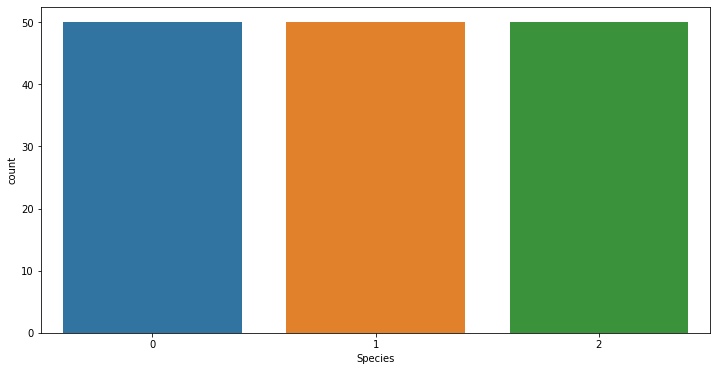

In [10]:
# checking if the data is uniformly distributed between different labels 
plt.figure(figsize=(12,6))
sns.countplot(x=iris['Species'])

since all the three types of variable are almost in same proportion.This means we are in a good state 

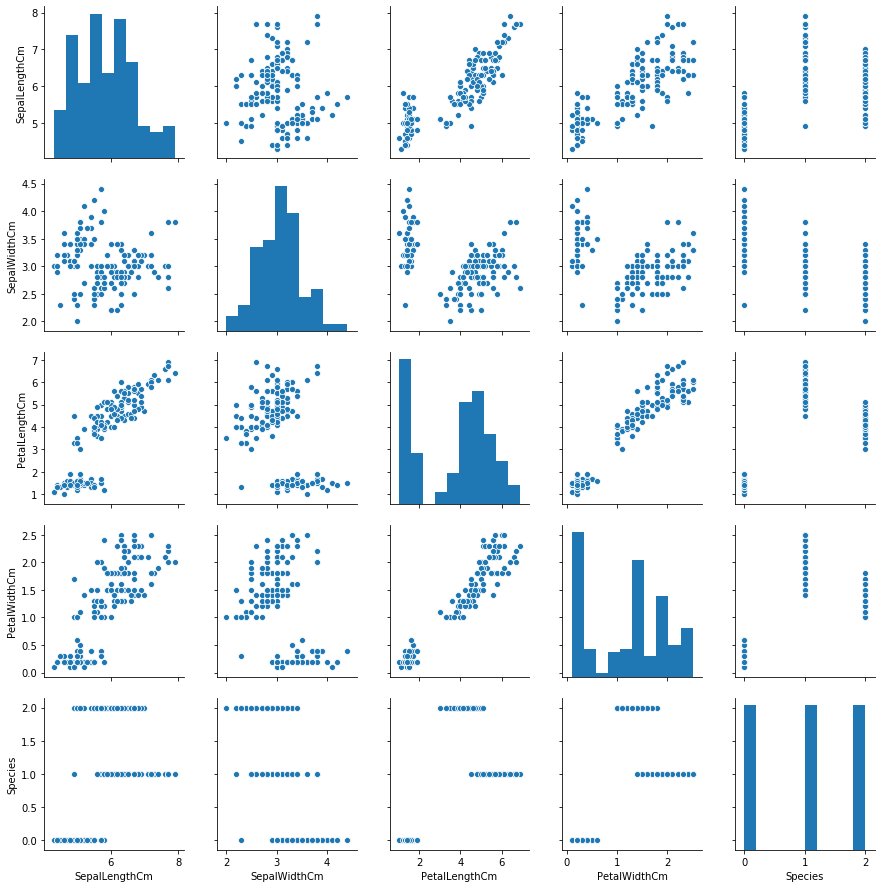

In [11]:
sns.pairplot(iris)

 Now splitting the data into Train data and Test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = iris.drop('Species',axis=1)
y = iris['Species']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3)

In [15]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
25,4.8,3.4,1.9,0.2
19,5.7,3.8,1.7,0.3
140,6.9,3.1,5.4,2.1
46,4.8,3.0,1.4,0.3
146,6.7,3.0,5.2,2.3
...,...,...,...,...
150,5.9,3.0,5.1,1.8
20,5.1,3.8,1.5,0.3
128,6.1,3.0,4.9,1.8


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# now our model is ready.let us try to predict our test data

In [20]:
prediction  = model.predict(x_test)

In [21]:
yy_test = y_test.reset_index()

In [22]:
Actual_vs_predicted_data = pd.DataFrame(prediction,columns=['predicted'])

In [23]:
Actual_vs_predicted_data['original_value'] = yy_test['Species']

In [24]:
Actual_vs_predicted_data

,predicted,original_value
0,0,0
1,1,1
2,2,2
3,0,0
4,1,1
5,2,2
6,0,0
7,2,2
8,2,1
9,1,1


#### the above table shows that our data was able to predict most of the classes correctly

In [25]:
from sklearn.tree import plot_tree

let's plot this model

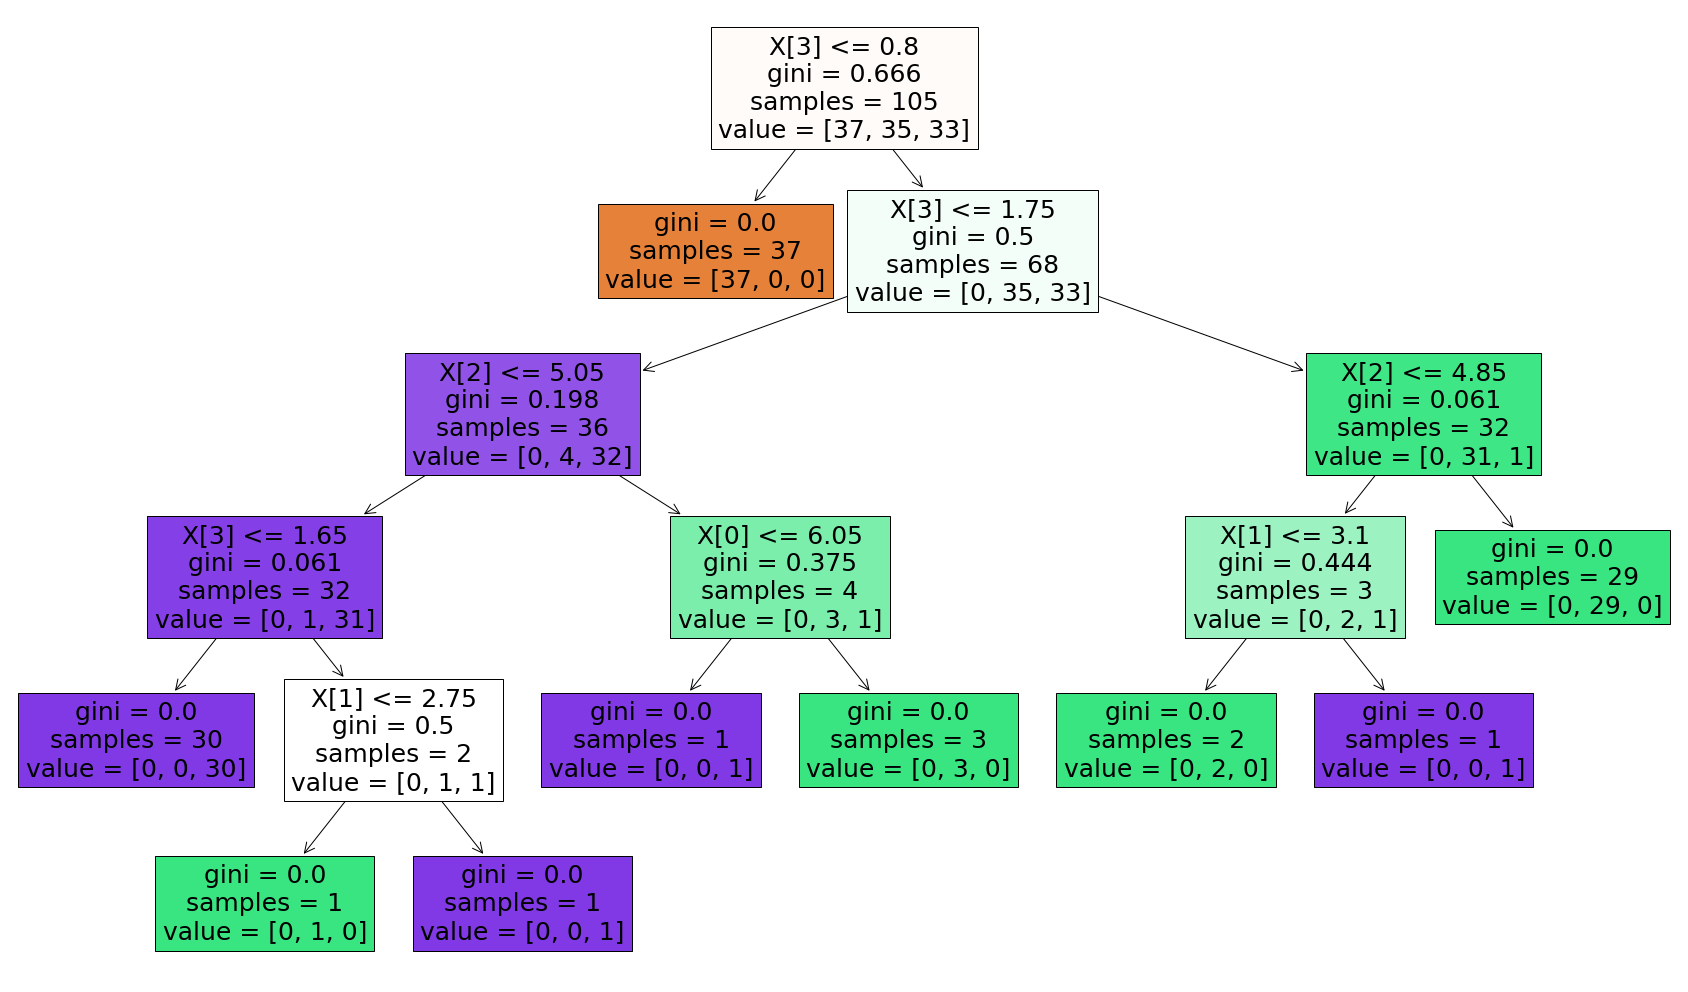

In [36]:
plt.figure(figsize=(30,18))
plot_tree(model,filled=True,fontsize=25);

Acquiring the confusion matrix and classification report of predicted data

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,prediction))

[[13  0  0]
 [ 0 14  1]
 [ 0  0 17]]


In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### As this report suggests : precision,accuracy and f1 score of our model is satisfactory

####  we can now feed any new data and it would be able to predict the right class accordingly